In [ ]:
#Author: ML Tlachac
#year: 2018
#for paper: Anomalous Antimicrobial Susceptibility Trend Identification
#paper at EMBC2020

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import math
from sklearn import linear_model
from sklearn.svm import SVR
from statsmodels.tsa.arima_model import ARIMA
from scipy import stats
df = pd.read_csv('C:/Users/mltla/Documents/Outliers/dataset.csv', header = 0)
df = df[df["Total Tests (by organism)"] > 0]
#df = df[df.organism == "E. coli"]

In [ ]:
#parameters
samples = 0
targetYears = [2013, 2014, 2015, 2016]
yearsAhead = 1
totalYears = 10  ##### experiment with
nYears = 3
reportsY = 1
reportsy9 = 1
reportsy8 = 1
#calculations
df = df[df["Total Tests (by organism)"] >=samples]
years9 = []
years1 = []
for Y in targetYears:
    years9.append(Y-yearsAhead)
    years1.append(Y-(yearsAhead-1)-totalYears)
print("Target Years: " + str(targetYears))
print("Testing Years: " + str(years9))
print("Starting Years: " + str(years1))

In [ ]:
antibiotic = []
bacteria = []
tY = []
y9 = []
y1 = []

r = []
rY = []
ry9 = []
ry8 = []

actualY = []
actual9 = []
actual8 = []

sdY = []
sd9 = []
sd8 = []

RegLinY = []
RegPolyY = []
SVRlinY = []
SVRrbfY = []
SVRsigY = []

RegLinYw = []
RegPolyYw = []
SVRlinYw = []
SVRrbfYw = []
SVRsigYw = []

RegLin9 = []
RegPoly9 = []
SVRlin9 = []
SVRrbf9 = []
SVRsig9 = []

RegLin9w = []
RegPoly9w = []
SVRlin9w = []
SVRrbf9w = []
SVRsig9w = []

#arimaYa = []
#arimaYb = []

for org in set(df.organism):
    for ab in set(df.component):
        tdf = df[(df.component == ab) & (df.organism == org)]
        for Y in range(0,len(targetYears)):
            tempdf9=tdf[(tdf['Report Year'] <= years9[Y]) & (tdf['Report Year'] >= (years1[Y]))]
            tempdf8=tdf[(tdf['Report Year'] <= (years9[Y]-1)) & (tdf['Report Year'] >= (years1[Y]-1))]
            ttdfY = tdf[(tdf['Report Year'] == targetYears[Y])]
            ttdf9 = tdf[(tdf['Report Year'] == years9[Y])]
            ttdf8 = tdf[(tdf['Report Year'] == (years9[Y]-1))]
            if ((len(set(tempdf9["Report Year"])) >= nYears) & (len(set(tempdf8["Report Year"])) >= nYears) & (ttdfY.shape[0]>=reportsY) & (ttdf9.shape[0]>=reportsy9) & (ttdf8.shape[0]>=reportsy8)):
                tempdf9=tempdf9.set_index(np.arange(0,tempdf9.shape[0]))
                tempdf8=tempdf8.set_index(np.arange(0,tempdf8.shape[0]))
                ttdfY=ttdfY.set_index(np.arange(0,ttdfY.shape[0]))
                ttdf9=ttdf9.set_index(np.arange(0,ttdf9.shape[0]))
                ttdf8=ttdf8.set_index(np.arange(0,ttdf8.shape[0])) 
                
                antibiotic.append(ab)
                bacteria.append(org) 
                r.append(tdf.shape[0])
                rY.append(ttdfY.shape[0])
                ry9.append(ttdf9.shape[0])
                ry8.append(ttdf8.shape[0])
                tY.append(targetYears[Y])
                y9.append(years9[Y])
                y1.append(years1[Y])
                
                #Calculate actual and sd
                year9 = []
                susc9 = []
                weight9 = []
                for i in range(0, len(tempdf9)):
                    year9.append(tempdf9["Report Year"][i])
                    susc9.append(tempdf9["Indicator Value (Pct)"][i])
                    weight9.append(tempdf9["Total Tests (by organism)"][i])
                year8 = []
                susc8 = []
                weight8 = []
                for i in range(0, len(tempdf8)):
                    year8.append(tempdf8["Report Year"][i])
                    susc8.append(tempdf8["Indicator Value (Pct)"][i])
                    weight8.append(tempdf8["Total Tests (by organism)"][i])

                year9T = np.transpose(np.matrix(year9))
                susc9T = np.transpose(np.matrix(susc9))
                year8T = np.transpose(np.matrix(year8))
                susc8T = np.transpose(np.matrix(susc8))
                weight8T = np.transpose(np.matrix(weight8))
                weight9T = np.transpose(np.matrix(weight9))
                aY = 0
                a9 = 0
                a8 = 0
                sY = 0
                s9 = 0
                s8 = 0
                for a in range(0, ttdfY.shape[0]):
                    aY = aY + ttdfY["Total Tests (by organism)"][a] * ttdfY["Indicator Value (Pct)"][a]
                    sY = sY + (ttdfY["Indicator Value (Pct)"][a] - sum(ttdfY["Indicator Value (Pct)"])/ttdfY.shape[0])**2
                sdY.append((sY/ttdfY.shape[0])**(1/2))  
                actualY.append(aY/sum(ttdfY["Total Tests (by organism)"]))
                for a in range(0, ttdf9.shape[0]):
                    a9 = a9 + ttdf9["Total Tests (by organism)"][a] * ttdf9["Indicator Value (Pct)"][a]
                    s9 = s9 + (ttdf9["Indicator Value (Pct)"][a] - sum(ttdf9["Indicator Value (Pct)"])/ttdf9.shape[0])**2
                sd9.append((s9/ttdf9.shape[0])**(1/2))
                actual9.append(a9/sum(ttdf9["Total Tests (by organism)"]))
                for a in range(0, ttdf8.shape[0]):
                    a8 = a8 + ttdf8["Total Tests (by organism)"][a] * ttdf8["Indicator Value (Pct)"][a]
                    s8 = s8 + (ttdf8["Indicator Value (Pct)"][a] - sum(ttdf8["Indicator Value (Pct)"])/ttdf8.shape[0])**2    
                sd8.append((s8/ttdf8.shape[0])**(1/2))
                actual8.append(a8/sum(ttdf8["Total Tests (by organism)"]))
                
                #ARIMA
                #setYear9 = list(set(year9))
                #setYear8 = list(set(year8))
                
                #ListYear9 = []
                #for item in setYear9:
                #    ListYear9.append(pd.to_datetime(str(item), yearfirst=True))
                #ListYear8 = []
                #for item in setYear8:
                #    ListYear8.append(pd.to_datetime(str(item), yearfirst=True))
            
                #suscList9 = []
                #for siny in setYear9:
                #    singleYear = tempdf9[(tempdf9['Report Year'] == siny)]
                #    suscList9.append(sum(singleYear["Total Tests (by organism)"]*singleYear["Indicator Value (Pct)"])/sum(singleYear["Total Tests (by organism)"]))
                    
                #suscList8 = []
                #for siny in setYear8:
                #    singleYear = tempdf8[(tempdf8['Report Year'] == siny)]
                #    suscList8.append(sum(singleYear["Total Tests (by organism)"]*singleYear["Indicator Value (Pct)"])/sum(singleYear["Total Tests (by organism)"]))
                
                #dfYear9 = pd.DataFrame()
                #dfYear9["year"] = ListYear9
                #dfYear9["pct"] = suscList9
                #dfYear9 = dfYear9.set_index("year")
                #dfYear8 = pd.DataFrame()
                #dfYear8["year"] = ListYear8
                #dfYear8["pct"] = suscList8
                #dfYear8 = dfYear8.set_index("year")
                
                #modelYa = ARIMA(dfYear9, order = (1,0,0), freq = 'AS')
                #modelYb = ARIMA(dfYear9, order = (0,1,0), freq = 'AS')

                #modelFitYa = modelYa.fit(disp=0)
                #modelFitYb = modelYb.fit(disp=0)

                #arimaYa.append(modelFitYa.forecast()[0][0])
                #arimaYb.append(modelFitYb.forecast()[0][0])
                    
                #Previous Fit
                regr8 = linear_model.LinearRegression()
                regr8.fit(year8T, susc8T)
                RegLin9.append(regr8.predict(years9[Y])[0][0])
                regr8w = linear_model.LinearRegression()
                regr8w.fit(year8T, susc8T, sample_weight = weight8)
                RegLin9w.append(regr8w.predict(years9[Y])[0][0])

                clfL8 = SVR(kernel = "linear")
                clfL8.fit(year8T.reshape(-1,1), susc8)
                SVRlin9.append(clfL8.predict(years9[Y])[0])
                clfL8w = SVR(kernel = "linear")
                clfL8w.fit(year8T.reshape(-1,1), susc8, sample_weight = weight8)
                SVRlin9w.append(clfL8w.predict(years9[Y])[0])

                clf8 = SVR(kernel = "rbf")
                clf8.fit(year8T.reshape(-1,1), susc8)
                SVRrbf9.append(clf8.predict(years9[Y])[0])
                clf8w = SVR(kernel = "rbf")
                clf8w.fit(year8T.reshape(-1,1), susc8, sample_weight = weight8)
                SVRrbf9w.append(clf8w.predict(years9[Y])[0])

                clfS8 = SVR(kernel = "sigmoid")
                clfS8.fit(year8T.reshape(-1,1), susc8)
                SVRsig9.append(clfS8.predict(years9[Y])[0])
                clfS8w = SVR(kernel = "sigmoid")
                clfS8w.fit(year8T.reshape(-1,1), susc8, sample_weight = weight8)
                SVRsig9w.append(clfS8w.predict(years9[Y])[0])

                z8 = np.polyfit(year8, susc8, 2)
                p8 = np.poly1d(z8)
                RegPoly9.append(p8(years9[Y]))
                z8w = np.polyfit(year8, susc8, 2, w = weight8)
                p8w = np.poly1d(z8w)
                RegPoly9w.append(p8w(years9[Y]))

                #Current Fit
                regr9 = linear_model.LinearRegression()
                regr9.fit(year9T, susc9T)
                RegLinY.append(regr9.predict(targetYears[Y])[0][0])
                regr9w = linear_model.LinearRegression()
                regr9w.fit(year9T, susc9T, sample_weight = weight9)
                RegLinYw.append(regr9w.predict(targetYears[Y])[0][0])

                clfL9 = SVR(kernel = "linear")
                clfL9.fit(year9T.reshape(-1,1), susc9)
                SVRlinY.append(clfL9.predict(targetYears[Y])[0])
                clfL9w = SVR(kernel = "linear")
                clfL9w.fit(year9T.reshape(-1,1), susc9, sample_weight = weight9)
                SVRlinYw.append(clfL9w.predict(targetYears[Y])[0])

                clf9 = SVR(kernel = "rbf")
                clf9.fit(year9T.reshape(-1,1), susc9)
                SVRrbfY.append(clf9.predict(targetYears[Y])[0])
                clf9w = SVR(kernel = "rbf")
                clf9w.fit(year9T.reshape(-1,1), susc9, sample_weight = weight9)
                SVRrbfYw.append(clf9w.predict(targetYears[Y])[0])

                clfS9 = SVR(kernel = "sigmoid")
                clfS9.fit(year9T.reshape(-1,1), susc9)
                SVRsigY.append(clfS9.predict(targetYears[Y])[0])
                clfS9w = SVR(kernel = "sigmoid")
                clfS9w.fit(year9T.reshape(-1,1), susc9, sample_weight = weight9)
                SVRsigYw.append(clfS9w.predict(targetYears[Y])[0])

                z9 = np.polyfit(year9, susc9, 2)
                p9 = np.poly1d(z9)
                RegPolyY.append(p9(targetYears[Y]))
                z9w = np.polyfit(year9, susc9, 2, w = weight9)
                p9w = np.poly1d(z9w)
                RegPolyYw.append(p9w(targetYears[Y]))             
    
                
#Calculate Differences                
LRYd = []
PRYd = []
LSYd = []
GSYd = []
SSYd = []
pmYd = []
LRYwd = []
PRYwd = []
LSYwd = []
GSYwd = []
SSYwd = []
#arimaYAd = []
#arimaYBd = []
for c in range(0, len(actualY)):
    LRYd.append(abs(RegLinY[c]-actualY[c]))
    PRYd.append(abs(RegPolyY[c]-actualY[c]))
    LSYd.append(abs(SVRlinY[c]-actualY[c]))
    GSYd.append(abs(SVRrbfY[c]-actualY[c]))
    SSYd.append(abs(SVRsigY[c]-actualY[c]))
    pmYd.append(abs(actualY[c]-actual9[c]))
    LRYwd.append(abs(RegLinYw[c]-actualY[c]))
    PRYwd.append(abs(RegPolyYw[c]-actualY[c]))
    LSYwd.append(abs(SVRlinYw[c]-actualY[c]))
    GSYwd.append(abs(SVRrbfYw[c]-actualY[c]))
    SSYwd.append(abs(SVRsigYw[c]-actualY[c]))
    #arimaYAd.append(abs(actualY[c] - arimaYa[c]))
    #arimaYBd.append(abs(actualY[c] - arimaYb[c]))

LR9d = []
PR9d = []
LS9d = []
GS9d = []
SS9d = []
pm9d = []
LR9wd = []
PR9wd = []
LS9wd = []
GS9wd = []
SS9wd = []
for c in range(0, len(actual9)):
    LR9d.append(abs(RegLin9[c]-actual9[c]))  
    PR9d.append(abs(RegPoly9[c]-actual9[c]))
    LS9d.append(abs(SVRlin9[c]-actual9[c]))
    GS9d.append(abs(SVRrbf9[c]-actual9[c]))
    SS9d.append(abs(SVRsig9[c]-actual9[c]))
    pm9d.append(abs(actual9[c]-actual8[c]))
    LR9wd.append(abs(RegLin9w[c]-actual9[c]))  
    PR9wd.append(abs(RegPoly9w[c]-actual9[c]))
    LS9wd.append(abs(SVRlin9w[c]-actual9[c]))
    GS9wd.append(abs(SVRrbf9w[c]-actual9[c]))
    SS9wd.append(abs(SVRsig9w[c]-actual9[c]))
                
#PYPER
upperbound = []
PYPER = []
for i in range(0, len(actualY)):
    upperbound.append(min(LR9d[i], LS9d[i], GS9d[i], PR9d[i], SS9d[i]))
    if (upperbound[i] == LR9d[i]):
        PYPER.append(RegLinY[i])
    elif (upperbound[i] == LS9d[i]):
        PYPER.append(SVRlinY[i])
    elif (upperbound[i] == GS9d[i]):
        PYPER.append(SVRrbfY[i])
    elif (upperbound[i] == PR9d[i]):
        PYPER.append(RegPolyY[i])
    elif (upperbound[i] == SS9d[i]):
        PYPER.append(SVRsigY[i])
        
upperboundW = []
PYPERw = []
for i in range(0, len(actualY)):
    upperboundW.append(min(LR9wd[i], LS9wd[i], GS9wd[i], PR9wd[i], SS9wd[i]))
    if (upperboundW[i] == LR9wd[i]):
        PYPERw.append(RegLinYw[i])
    elif (upperboundW[i] == LS9wd[i]):
        PYPERw.append(SVRlinYw[i])
    elif (upperboundW[i] == GS9wd[i]):
        PYPERw.append(SVRrbfYw[i])
    elif (upperboundW[i] == PR9wd[i]):
        PYPERw.append(RegPolyYw[i])
    elif (upperboundW[i] == SS9wd[i]):
        PYPERw.append(SVRsigYw[i])
        
PYP = []
for item in PYPER:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    PYP.append(item)
PYW = []
for item in PYPERw:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    PYW.append(item)
LRY = []
for item in RegLinY:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    LRY.append(item)
PRY = []
for item in RegPolyY:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    PRY.append(item)
LSY = []
for item in SVRlinY:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    LSY.append(item)
GSY = []
for item in SVRrbfY:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    GSY.append(item)
SSY = []
for item in SVRsigY:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    SSY.append(item)
LRYw = []
for item in RegLinYw:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    LRYw.append(item)
PRYw = []
for item in RegPolyYw:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    PRYw.append(item)
LSYw = []
for item in SVRlinYw:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    LSYw.append(item)
GSYw = []
for item in SVRrbfYw:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    GSYw.append(item)
SSYw = []
for item in SVRsigYw:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    SSYw.append(item)    
AYA = []
for item in arimaYa:
    if item < 0:
        item = 0
    if item > 100:
        item = 100
    AYA.append(item)
#AYB = []
#for item in arimaYb:
#    if item < 0:
#        item = 0
#    if item > 100:
#        item = 100
#    AYB.append(item)
    
#Calculate Difference
PYPd = []
PYWd = []
LRYd = []
PRYd = []
LSYd = []
GSYd = []
SSYd = []
LRYwd = []
PRYwd = []
LSYwd = []
GSYwd = []
SSYwd = []
#AYAd = []
#AYBd = []
for c in range(0, len(actualY)):
    PYPd.append(abs(PYP[c]-actualY[c]))
    PYWd.append(abs(PYW[c]-actualY[c]))
    LRYd.append(abs(LRY[c]-actualY[c]))
    PRYd.append(abs(PRY[c]-actualY[c]))
    LSYd.append(abs(LSY[c]-actualY[c]))
    GSYd.append(abs(GSY[c]-actualY[c]))
    SSYd.append(abs(SSY[c]-actualY[c]))
    LRYwd.append(abs(LRYw[c]-actualY[c]))
    PRYwd.append(abs(PRYw[c]-actualY[c]))
    LSYwd.append(abs(LSYw[c]-actualY[c]))
    GSYwd.append(abs(GSYw[c]-actualY[c]))
    SSYwd.append(abs(SSYw[c]-actualY[c]))
#    AYAd.append(abs(AYA[c]-actualY[c]))
#    AYBd.append(abs(AYB[c]-actualY[c]))
        
#Create DataFrame    
outputDF = pd.DataFrame()

outputDF["antibiotic"] = antibiotic
outputDF["bacteria"] = bacteria
outputDF["tY"] = tY
outputDF["y9"] = y9
outputDF["y1"] = y1

outputDF["r"] = r
outputDF["rY"] = rY
outputDF["ry9"] = ry9
outputDF["ry8"] = ry8

outputDF["actualY"] = actualY
outputDF["actual9"] = actual9
outputDF["actual8"] = actual8
outputDF["sdY"] = sdY
outputDF["sd9"] = sd9
outputDF["sd8"] = sd8

outputDF["PYPd"] = PYPd
outputDF["PYWd"] = PYWd
outputDF["pmYd"] = pmYd
outputDF["LRYd"] = LRYd
outputDF["PRYd"] = PRYd
outputDF["LSYd"] = LSYd
outputDF["GSYd"] = GSYd
outputDF["SSYd"] = SSYd
outputDF["LRYwd"] = LRYwd
outputDF["PRYwd"] = PRYwd
outputDF["LSYwd"] = LSYwd
outputDF["GSYwd"] = GSYwd
outputDF["SSYwd"] = SSYwd
#outputDF["AYAd"] = AYAd
#outputDF["AYBd"] = AYBd

In [ ]:
#Before Outlier Removal Stats
outputDF13 = outputDF[outputDF.tY==2013]
outputDF14 = outputDF[outputDF.tY==2014]
outputDF15 = outputDF[outputDF.tY==2015]
outputDF16 = outputDF[outputDF.tY==2016]
Method = ["All", "y13", "y14", "y15", "y16", "PreviousMean", "PYPER", "wPYPER", "LinearRegression", "PolynomialRegression", "LinearSVR", "GaussianSVR", "SigmoidSVR", "wLinearRegression", "wPolynomialRegression", "wLinearSVR", "wGaussianSVR", "wSigmoidSVR"]#, "ARIMA100", "ARIMA010"]
t = outputDF.shape[0]
Avg = [outputDF.shape[0], outputDF13.shape[0], outputDF14.shape[0], outputDF15.shape[0], outputDF16.shape[0], sum(outputDF.pmYd)/t, sum(outputDF.PYPd)/t, sum(outputDF.PYWd)/t, sum(outputDF.LRYd)/t, sum(outputDF.PRYd)/t, sum(outputDF.LSYd)/t, sum(outputDF.GSYd)/t, sum(outputDF.SSYd)/t, sum(outputDF.LRYwd)/t, sum(outputDF.PRYwd)/t, sum(outputDF.LSYwd)/t, sum(outputDF.GSYwd)/t, sum(outputDF.SSYwd)/t]#, sum(outputDF.AYAd)/t, sum(outputDF.AYBd)/t]
metricDF = pd.DataFrame()
metricDF["Method"] = Method
metricDF["Baseline"] = Avg

In [ ]:
antibiotic = []
bacteria = []
susc = []
reports = []
negIndex = []
posIndex = []
years = []
allyears = sorted(list(set(df["Report Year"])))
for org in set(df.organism):
    for ab in set(df.component):
        tempdf = df[(df.component == ab) & (df.organism == org)]
        if tempdf.shape[0]>0:
            antibiotic.append(ab)
            bacteria.append(org)
            timeseries = []
            nlist = []
            neg = []
            pos = []
            for a in range(0, len(allyears)):
                temptempdf = tempdf[(tempdf["Report Year"] == allyears[a])]
                if temptempdf.shape[0]>1:
                    timeseries.append(sum(temptempdf["Total Tests (by organism)"]*temptempdf["Indicator Value (Pct)"])/sum(temptempdf["Total Tests (by organism)"]))
                    nlist.append(temptempdf.shape[0])
                    pos.append(a)
                else: 
                    timeseries.append(-1)
                    nlist.append(-1)
                    neg.append(a)
            susc.append(timeseries)
            reports.append(nlist)
            negIndex.append(neg)
            posIndex.append(pos)
            years.append(allyears)

for row in range(0, len(susc)):
    if len(negIndex[row])>0:
        for i in range(1, len(posIndex[row])):
            n = posIndex[row][i] - posIndex[row][i-1]
            if n > 1:
                for j in range(1, n): 
                    susc[row][posIndex[row][i-1]+j] = susc[row][posIndex[row][i-1]] + j * (susc[row][posIndex[row][i]] - susc[row][posIndex[row][i-1]])/n

AB16 = []
bact16 = []
AB15 = []
bact15 = []
AB14 = []
bact14 = []
AB13 = []
bact13 =[]
t16Y = []
t16N = []
t16susc1 = []
t16years1 = []
t16reports1 = []
t16susc2 = []
t16years2 = []
t16reports2 = []
t15Y = []
t15N = []
t15susc1 = []
t15years1 = []
t15reports1 = []
t15susc2 = []
t15years2 = []
t15reports2 = []
t14Y = []
t14N = []
t14susc1 = []
t14years1 = []
t14reports1 = []
t14susc2 = []
t14years2 = []
t14reports2 = []
t13Y = []
t13N = []
t13susc1 = []
t13years1 = []
t13reports1 = []
t13susc2 = []
t13years2 = []
t13reports2 = []

for row in range(0, len(susc)):
    if susc[row][-2] > -1:
        t16Y.append(susc[row][-1])
        t16N.append(reports[row][-1])
        AB16.append(antibiotic[row])
        bact16.append(bacteria[row])
        susc1 = []
        years1 = []
        reports1 = []
        for i in posIndex[row]:
            if i in range(4,14): 
                susc1.append(susc[row][i])
                years1.append(years[row][i])
                reports1.append(reports[row][i])
        t16susc1.append(susc1)
        t16years1.append(years1)
        t16reports1.append(reports1)
        count = 0
        for i in susc[row][4:14]:
            if i == -1:
                count = count+1
        t16susc2.append(susc[row][4+count:14])
        t16years2.append(years[row][4+count:14])
        t16reports2.append(reports[row][4+count:14])
    if susc[row][-3] > -1:
        t15Y.append(susc[row][-2])
        t15N.append(reports[row][-2])
        AB15.append(antibiotic[row])
        bact15.append(bacteria[row])
        susc1 = []
        years1 = []
        reports1 = []
        for i in posIndex[row]:
            if i in range(3,13): 
                susc1.append(susc[row][i])
                years1.append(years[row][i])
                reports1.append(reports[row][i])
        t15susc1.append(susc1)
        t15years1.append(years1)
        t15reports1.append(reports1)
        count = 0
        for i in susc[row][3:13]:
            if i == -1:
                count = count+1
        t15susc2.append(susc[row][3+count:13])
        t15years2.append(years[row][3+count:13])
        t15reports2.append(reports[row][3+count:13])
    if susc[row][-4] > -1:
        t14Y.append(susc[row][-3])
        t14N.append(reports[row][-3])
        AB14.append(antibiotic[row])
        bact14.append(bacteria[row])
        susc1 = []
        years1 = []
        reports1 = []
        for i in posIndex[row]:
            if i in range(2,12): 
                susc1.append(susc[row][i])
                years1.append(years[row][i])
                reports1.append(reports[row][i])
        t14susc1.append(susc1)
        t14years1.append(years1)
        t14reports1.append(reports1)
        count = 0
        for i in susc[row][2:12]:
            if i == -1:
                count = count+1
        t14susc2.append(susc[row][2+count:12])
        t14years2.append(years[row][2+count:12])
        t14reports2.append(reports[row][2+count:12])
    if susc[row][-5] > -1:
        t13Y.append(susc[row][-4])
        t13N.append(reports[row][-4])
        AB13.append(antibiotic[row])
        bact13.append(bacteria[row])
        susc1 = []
        years1 = []
        reports1 = []
        for i in posIndex[row]:
            if i in range(1,11): 
                susc1.append(susc[row][i])
                years1.append(years[row][i])
                reports1.append(reports[row][i])
        t13susc1.append(susc1)
        t13years1.append(years1)
        t13reports1.append(reports1)
        count = 0
        for i in susc[row][1:11]:
            if i == -1:
                count = count+1
        t13susc2.append(susc[row][1+count:11])
        t13years2.append(years[row][1+count:11])
        t13reports2.append(reports[row][1+count:11])
        
New16 = pd.DataFrame()
New16["antibiotic"] = AB16
New16["bacteria"] = bact16
New16["targetSusc"] = t16Y
New16["targetRep"] = t16N
New16["susc"] = t16susc1
New16["years"] = t16years1
New16["reports"] = t16reports1

New16f = pd.DataFrame()
New16f["antibiotic"] = AB16
New16f["bacteria"] = bact16
New16f["targetSusc"] = t16Y
New16f["targetRep"] = t16N
New16f["susc"] = t16susc2
New16f["years"] = t16years2
New16f["reports"] = t16reports2

New15 = pd.DataFrame()
New15["antibiotic"] = AB15
New15["bacteria"] = bact15
New15["targetSusc"] = t15Y
New15["targetRep"] = t15N
New15["susc"] = t15susc1
New15["years"] = t15years1
New15["reports"] = t15reports1

New15f = pd.DataFrame()
New15f["antibiotic"] = AB15
New15f["bacteria"] = bact15
New15f["targetSusc"] = t15Y
New15f["targetRep"] = t15N
New15f["susc"] = t15susc2
New15f["years"] = t15years2
New15f["reports"] = t15reports2

New14 = pd.DataFrame()
New14["antibiotic"] = AB14
New14["bacteria"] = bact14
New14["targetSusc"] = t14Y
New14["targetRep"] = t14N
New14["susc"] = t14susc1
New14["years"] = t14years1
New14["reports"] = t14reports1

New14f = pd.DataFrame()
New14f["antibiotic"] = AB14
New14f["bacteria"] = bact14
New14f["targetSusc"] = t14Y
New14f["targetRep"] = t14N
New14f["susc"] = t14susc2
New14f["years"] = t14years2
New14f["reports"] = t14reports2

New13 = pd.DataFrame()
New13["antibiotic"] = AB13
New13["bacteria"] = bact13
New13["targetSusc"] = t13Y
New13["targetRep"] = t13N
New13["susc"] = t13susc1
New13["years"] = t13years1
New13["reports"] = t13reports1

New13f = pd.DataFrame()
New13f["antibiotic"] = AB13
New13f["bacteria"] = bact13
New13f["targetSusc"] = t13Y
New13f["targetRep"] = t13N
New13f["susc"] = t13susc2
New13f["years"] = t13years2
New13f["reports"] = t13reports2

In [53]:
for i in range(0, New16.shape[0]):
    if len(New16.susc[i]) < 3:
        New16 = New16.drop([i])
New16=New16.set_index(np.arange(0,New16.shape[0]))
print(New16.shape[0])

for i in range(0, New16f.shape[0]):
    if len(New16f.susc[i]) < 3:
        New16f = New16f.drop([i])
New16f=New16f.set_index(np.arange(0,New16f.shape[0]))
print(New16f.shape[0])

for i in range(0, New15.shape[0]):
    if len(New15.susc[i]) < 3:
        New15 = New15.drop([i])
New15=New15.set_index(np.arange(0,New15.shape[0]))
print(New15.shape[0])

for i in range(0, New15f.shape[0]):
    if len(New15f.susc[i]) < 3:
        New15f = New15f.drop([i])
New15f=New15f.set_index(np.arange(0,New15f.shape[0]))
print(New15f.shape[0])

for i in range(0, New14.shape[0]):
    if len(New14.susc[i]) < 3:
        New14 = New14.drop([i])
New14=New14.set_index(np.arange(0,New14.shape[0]))
print(New14.shape[0])

for i in range(0, New14f.shape[0]):
    if len(New14f.susc[i]) < 3:
        New14f = New14f.drop([i])
New14f=New14f.set_index(np.arange(0,New14f.shape[0]))
print(New14f.shape[0])

for i in range(0, New13.shape[0]):
    if len(New13.susc[i]) < 3:
        New13 = New13.drop([i])
New13=New13.set_index(np.arange(0,New13.shape[0]))
print(New13.shape[0])

for i in range(0, New13f.shape[0]):
    if len(New13f.susc[i]) < 3:
        New13f = New13f.drop([i])
New13f=New13f.set_index(np.arange(0,New13f.shape[0]))
print(New13f.shape[0])

NewDFs = [New16, New16f, New15, New15f, New14, New14f, New13, New13f]
theTargets = [2016, 2016, 2015, 2015, 2014, 2014, 2013, 2013]
theStatus = ["original", "filled", "original", "filled", "original", "filled", "original", "filled"]

281
281
285
286
289
290
282
285


In [54]:
listSummaryDF = []
K = [1, 2, 3, 4, 5]

for new in range(0, len(NewDFs)):
    ss = [[], [], [], [], [], [], [], []]
    ssi = [[], [], [], [], [], [], [], []]
    sl = [10, 9, 8, 7, 6, 5, 4, 3]
    for row in range(0, NewDFs[new].shape[0]):
        for index in range(0, len(sl)):
            if len(NewDFs[new].susc[row]) >= sl[index]:
                ssi[index].append(row)
                ss[index].append(NewDFs[new].susc[row][-sl[index]:])

    cs = [[], [], [], [], [], [], [], []]
    statusList = []
    yearList = []
    for index in range(0, len(sl)):
        statusList.append(theStatus[new])
        yearList.append(theTargets[new])
        for alist in ss[index]:
            c = []
            for i in range(1, len(alist)):
                c.append(alist[i]-alist[0]) #########
            cs[index].append(c)
            
    dfArray = [pd.DataFrame(cs[0]), pd.DataFrame(cs[1]), pd.DataFrame(cs[2]), pd.DataFrame(cs[3]), pd.DataFrame(cs[4]), pd.DataFrame(cs[5]), pd.DataFrame(cs[6]), pd.DataFrame(cs[7])]
    
    outliers5pct = [[], [], [], [], []]
    outliers10pct = [[], [], [], [], []]
    outliers15pct = [[], [], [], [], []]
    outliers20pct = [[], [], [], [], []]
    outliers25pct = [[], [], [], [], []]
    
    for k in range(0, len(K)):
        for frame in range(0, len(sl)):
            kmeans = KMeans(n_clusters=K[k], random_state=K[k]).fit(dfArray[frame])
            cluster = kmeans.labels_
            center = kmeans.cluster_centers_
            distance = []
            labels = []
            theCluster = []
            for i in range(0, len(dfArray[frame][0])): 
                distance.append(ssd.euclidean(center[cluster[i]], dfArray[frame].loc[i]))
                theCluster.append(center[cluster[i]])
                labels.append(ssi[frame][i])
            fc = pd.DataFrame()
            fc["labels"]=labels
            fc["distance"]=distance
            fc["index"] = ssi[frame]
            fcsort = fc.sort_values(by ="distance", ascending = False)
            templist = []
            for item in fcsort["index"]:
                templist.append(item)
            outliers5pct[k].append(templist[:int(0.05 * fcsort.shape[0])]) #########
            outliers10pct[k].append(templist[:int(0.1 * fcsort.shape[0])])
            outliers15pct[k].append(templist[:int(0.15 * fcsort.shape[0])])
            outliers20pct[k].append(templist[:int(0.2 * fcsort.shape[0])])
            outliers25pct[k].append(templist[:int(0.25 * fcsort.shape[0])])
    
    summaryDF = pd.DataFrame()
    summaryDF["target"] = yearList
    summaryDF["maxYears"] = sl 
    summaryDF["status"] = statusList
    for c in range(0, 5):
        summaryDF["c" + str(c+1) + "pct5"] = outliers5pct[c]
        summaryDF["c" + str(c+1) + "pct10"] = outliers10pct[c]
        summaryDF["c" + str(c+1) + "pct15"] = outliers15pct[c]
        summaryDF["c" + str(c+1) + "pct20"] = outliers20pct[c]
        summaryDF["c" + str(c+1) + "pct25"] = outliers25pct[c]
    listSummaryDF.append(summaryDF)

In [202]:
#listSummaryDF[0].to_csv("listSummary16.csv")
#listSummaryDF[2].to_csv("listSummary15.csv")
#listSummaryDF[4].to_csv("listSummary14.csv")

In [66]:
listSummaryDF[0][:2]

,target,maxYears,status,c1pct5,c1pct10,c1pct15,c1pct20,c1pct25,c2pct5,c2pct10,...,c4pct5,c4pct10,c4pct15,c4pct20,c4pct25,c5pct5,c5pct10,c5pct15,c5pct20,c5pct25
0,2016,10,original,"[88, 250, 122, 146, 85, 77, 0, 135, 109, 4, 270]","[88, 250, 122, 146, 85, 77, 0, 135, 109, 4, 27...","[88, 250, 122, 146, 85, 77, 0, 135, 109, 4, 27...","[88, 250, 122, 146, 85, 77, 0, 135, 109, 4, 27...","[88, 250, 122, 146, 85, 77, 0, 135, 109, 4, 27...","[88, 146, 85, 250, 0, 122, 4, 119, 270, 11, 206]","[88, 146, 85, 250, 0, 122, 4, 119, 270, 11, 20...",...,"[250, 122, 119, 11, 100, 30, 85, 111, 6, 77, 102]","[250, 122, 119, 11, 100, 30, 85, 111, 6, 77, 1...","[250, 122, 119, 11, 100, 30, 85, 111, 6, 77, 1...","[250, 122, 119, 11, 100, 30, 85, 111, 6, 77, 1...","[250, 122, 119, 11, 100, 30, 85, 111, 6, 77, 1...","[119, 11, 122, 100, 30, 85, 250, 111, 6, 102, ...","[119, 11, 122, 100, 30, 85, 250, 111, 6, 102, ...","[119, 11, 122, 100, 30, 85, 250, 111, 6, 102, ...","[119, 11, 122, 100, 30, 85, 250, 111, 6, 102, ...","[119, 11, 122, 100, 30, 85, 250, 111, 6, 102, ..."
1,2016,9,original,"[88, 85, 94, 146, 119, 96, 100, 111, 112, 178,...","[88, 85, 94, 146, 119, 96, 100, 111, 112, 178,...","[88, 85, 94, 146, 119, 96, 100, 111, 112, 178,...","[88, 85, 94, 146, 119, 96, 100, 111, 112, 178,...","[88, 85, 94, 146, 119, 96, 100, 111, 112, 178,...","[88, 94, 146, 85, 119, 96, 11, 178, 100, 111, 30]","[88, 94, 146, 85, 119, 96, 11, 178, 100, 111, ...",...,"[94, 85, 119, 11, 96, 30, 6, 146, 88, 122, 50]","[94, 85, 119, 11, 96, 30, 6, 146, 88, 122, 50,...","[94, 85, 119, 11, 96, 30, 6, 146, 88, 122, 50,...","[94, 85, 119, 11, 96, 30, 6, 146, 88, 122, 50,...","[94, 85, 119, 11, 96, 30, 6, 146, 88, 122, 50,...","[94, 119, 85, 11, 30, 96, 146, 88, 6, 122, 178]","[94, 119, 85, 11, 30, 96, 146, 88, 6, 122, 178...","[94, 119, 85, 11, 30, 96, 146, 88, 6, 122, 178...","[94, 119, 85, 11, 30, 96, 146, 88, 6, 122, 178...","[94, 119, 85, 11, 30, 96, 146, 88, 6, 122, 178..."


In [127]:
indexDFs = listSummaryDF
outputDFs = [outputDF16, outputDF16, outputDF15, outputDF15, outputDF14, outputDF14, outputDF13, outputDF13]
RemovalDFs16 = []
RemovalDFs15 = []
RemovalDFs14 = []
RemovalDFs13 = []
for i in range(0, len(indexDFs)):
    for row in range(0, indexDFs[i].shape[0]):
        for col in range(3, indexDFs[i].shape[1]):
        #for row in range(0, indexDFs[i].shape[0]):
            NewDFm = NewDFs[:]
            for index in set(indexDFs[i].iloc[row][col]):
                NewDFm[i] = NewDFm[i].drop([index])
            
            if (i == 0) | (i == 1):
                RemovalDFs16.append(pd.merge(NewDFm[i], outputDFs[i], on=['antibiotic', 'bacteria']))
            if (i == 2) | (i == 3):
                RemovalDFs15.append(pd.merge(NewDFm[i], outputDFs[i], on=['antibiotic', 'bacteria']))
            if (i == 4) | (i == 5):
                RemovalDFs14.append(pd.merge(NewDFm[i], outputDFs[i], on=['antibiotic', 'bacteria']))
            if (i == 6) | (i == 7):
                RemovalDFs13.append(pd.merge(NewDFm[i], outputDFs[i], on=['antibiotic', 'bacteria']))

In [129]:
names = []
for row in range(0, indexDFs[0].shape[0]):
    for item in list(indexDFs[0].columns.values)[3:]:
        names.append(item + indexDFs[0].iloc[row][2] + str(indexDFs[0].iloc[row][1]))
for row in range(0, indexDFs[1].shape[0]):
    for item in list(indexDFs[1].columns.values)[3:]:
        names.append(item + indexDFs[1].iloc[row][2] + str(indexDFs[1].iloc[row][1]))
print(len(names))
names[0:5]

400


['c1pct5original10',
 'c1pct10original10',
 'c1pct15original10',
 'c1pct20original10',
 'c1pct25original10']

In [130]:
outputDFs = [outputDF16, outputDF15, outputDF14, outputDF13]
metric13 = pd.DataFrame()
metric14 = pd.DataFrame()
metric15 = pd.DataFrame()
metric16 = pd.DataFrame()
metricAll = [metric16, metric15, metric14, metric13]
for i in range(0, len(metricAll)):
    Method = ["nPairsStart", "nPairsEnd", "nOutliers", "PreviousMean", "PYPER", "wPYPER", "LinearRegression", "PolynomialRegression", "LinearSVR", "GaussianSVR", "SigmoidSVR", "wLinearRegression", "wPolynomialRegression", "wLinearSVR", "wGaussianSVR", "wSigmoidSVR"]#, "ARIMA100", "ARIMA010"]
    t = outputDFs[i].shape[0]
    Avg = [outputDFs[i].shape[0], outputDFs[i].shape[0], 0, sum(outputDFs[i].pmYd)/t, sum(outputDFs[i].PYPd)/t, sum(outputDFs[i].PYWd)/t, sum(outputDFs[i].LRYd)/t, sum(outputDFs[i].PRYd)/t, sum(outputDFs[i].LSYd)/t, sum(outputDFs[i].GSYd)/t, sum(outputDFs[i].SSYd)/t, sum(outputDFs[i].LRYwd)/t, sum(outputDFs[i].PRYwd)/t, sum(outputDFs[i].LSYwd)/t, sum(outputDFs[i].GSYwd)/t, sum(outputDFs[i].SSYwd)/t]#, sum(outputDF.AYAd)/t, sum(outputDF.AYBd)/t]
    metricAll[i]["Method"] = Method
    metricAll[i]["StartAvg"] = Avg

for i in range(0, len(RemovalDFs16)):
    Method = ["nPairsStart", "nPairsEnd", "nOutliers", "PreviousMean", "PYPER", "wPYPER", "LinearRegression", "PolynomialRegression", "LinearSVR", "GaussianSVR", "SigmoidSVR", "wLinearRegression", "wPolynomialRegression", "wLinearSVR", "wGaussianSVR", "wSigmoidSVR"]#, "ARIMA100", "ARIMA010"]
    t16 = RemovalDFs16[i].shape[0]
    t15 = RemovalDFs15[i].shape[0]
    t14 = RemovalDFs14[i].shape[0]
    t13 = RemovalDFs13[i].shape[0]
    Avg16 = [outputDFs[0].shape[0], RemovalDFs16[i].shape[0], outputDFs[0].shape[0]-RemovalDFs16[i].shape[0], sum(RemovalDFs16[i].pmYd)/t16, sum(RemovalDFs16[i].PYPd)/t16, sum(RemovalDFs16[i].PYWd)/t16, sum(RemovalDFs16[i].LRYd)/t16, sum(RemovalDFs16[i].PRYd)/t16, sum(RemovalDFs16[i].LSYd)/t16, sum(RemovalDFs16[i].GSYd)/t16, sum(RemovalDFs16[i].SSYd)/t16, sum(RemovalDFs16[i].LRYwd)/t16, sum(RemovalDFs16[i].PRYwd)/t16, sum(RemovalDFs16[i].LSYwd)/t16, sum(RemovalDFs16[i].GSYwd)/t16, sum(RemovalDFs16[i].SSYwd)/t16]#, sum(outputDF.AYAd)/t, sum(outputDF.AYBd)/t]
    Avg15 = [outputDFs[1].shape[0], RemovalDFs15[i].shape[0], outputDFs[1].shape[0]-RemovalDFs15[i].shape[0], sum(RemovalDFs15[i].pmYd)/t15, sum(RemovalDFs15[i].PYPd)/t15, sum(RemovalDFs15[i].PYWd)/t15, sum(RemovalDFs15[i].LRYd)/t15, sum(RemovalDFs15[i].PRYd)/t15, sum(RemovalDFs15[i].LSYd)/t15, sum(RemovalDFs15[i].GSYd)/t15, sum(RemovalDFs15[i].SSYd)/t15, sum(RemovalDFs15[i].LRYwd)/t15, sum(RemovalDFs15[i].PRYwd)/t15, sum(RemovalDFs15[i].LSYwd)/t15, sum(RemovalDFs15[i].GSYwd)/t15, sum(RemovalDFs15[i].SSYwd)/t15]#, sum(outputDF.AYAd)/t, sum(outputDF.AYBd)/t]
    Avg14 = [outputDFs[2].shape[0], RemovalDFs14[i].shape[0], outputDFs[2].shape[0]-RemovalDFs14[i].shape[0], sum(RemovalDFs14[i].pmYd)/t14, sum(RemovalDFs14[i].PYPd)/t14, sum(RemovalDFs14[i].PYWd)/t14, sum(RemovalDFs14[i].LRYd)/t14, sum(RemovalDFs14[i].PRYd)/t14, sum(RemovalDFs14[i].LSYd)/t14, sum(RemovalDFs14[i].GSYd)/t14, sum(RemovalDFs14[i].SSYd)/t14, sum(RemovalDFs14[i].LRYwd)/t14, sum(RemovalDFs14[i].PRYwd)/t14, sum(RemovalDFs14[i].LSYwd)/t14, sum(RemovalDFs14[i].GSYwd)/t14, sum(RemovalDFs14[i].SSYwd)/t14]#, sum(outputDF.AYAd)/t, sum(outputDF.AYBd)/t]
    Avg13 = [outputDFs[3].shape[0], RemovalDFs13[i].shape[0], outputDFs[3].shape[0]-RemovalDFs13[i].shape[0], sum(RemovalDFs13[i].pmYd)/t13, sum(RemovalDFs13[i].PYPd)/t13, sum(RemovalDFs13[i].PYWd)/t13, sum(RemovalDFs13[i].LRYd)/t13, sum(RemovalDFs13[i].PRYd)/t13, sum(RemovalDFs13[i].LSYd)/t13, sum(RemovalDFs13[i].GSYd)/t13, sum(RemovalDFs13[i].SSYd)/t13, sum(RemovalDFs13[i].LRYwd)/t13, sum(RemovalDFs13[i].PRYwd)/t13, sum(RemovalDFs13[i].LSYwd)/t13, sum(RemovalDFs13[i].GSYwd)/t13, sum(RemovalDFs13[i].SSYwd)/t13]#, sum(outputDF.AYAd)/t, sum(outputDF.AYBd)/t]
    metricAll[0][names[i]] = Avg16
    metricAll[1][names[i]] = Avg15
    metricAll[2][names[i]] = Avg14
    metricAll[3][names[i]] = Avg13

In [273]:
metric16

,Method,StartAvg,c1pct5original10,c1pct10original10,c1pct15original10,c1pct20original10,c1pct25original10,c2pct5original10,c2pct10original10,c2pct15original10,...,c4pct5filled3,c4pct10filled3,c4pct15filled3,c4pct20filled3,c4pct25filled3,c5pct5filled3,c5pct10filled3,c5pct15filled3,c5pct20filled3,c5pct25filled3
0,nPairsStart,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,...,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
1,nPairsEnd,283.000000,259.000000,247.000000,236.000000,224.000000,212.000000,259.000000,247.000000,236.000000,...,256.000000,243.000000,232.000000,218.000000,206.000000,257.000000,245.000000,232.000000,220.000000,207.000000
2,nOutliers,0.000000,24.000000,36.000000,47.000000,59.000000,71.000000,24.000000,36.000000,47.000000,...,27.000000,40.000000,51.000000,65.000000,77.000000,26.000000,38.000000,51.000000,63.000000,76.000000
3,PreviousMean,2.606644,2.237789,1.952904,1.884229,1.838815,1.452009,2.283848,2.072075,1.970884,...,1.815348,1.486526,1.363235,1.242614,1.210900,2.160834,1.929758,1.766934,1.622604,1.612832
4,PYPER,2.759685,2.335474,2.208781,2.092731,2.107897,1.700868,2.390406,2.257719,2.147866,...,2.017964,1.596012,1.523093,1.436547,1.408546,2.345998,2.073205,1.942275,1.739431,1.706712
5,wPYPER,2.856946,2.312902,2.112881,1.951070,1.862321,1.460058,2.394036,2.152767,2.036569,...,2.142471,1.766890,1.544582,1.358985,1.334137,2.447730,2.186076,1.941660,1.696413,1.651599
6,LinearRegression,3.151167,2.580885,2.399759,2.264878,2.243173,1.774720,2.664566,2.528105,2.450375,...,2.314924,1.908551,1.749992,1.556810,1.520402,2.663857,2.314875,2.203563,1.997584,1.938293
7,PolynomialRegression,3.301432,2.925326,2.701015,2.550749,2.583821,2.130557,2.983331,2.850638,2.685082,...,2.574717,2.158999,2.033991,1.768421,1.764663,2.849310,2.610391,2.442897,2.223262,2.203330
8,LinearSVR,3.179209,2.834920,2.665758,2.470770,2.399565,1.969166,2.957689,2.733733,2.618091,...,2.560676,2.094069,1.874901,1.672841,1.607214,2.914140,2.537262,2.355300,2.284693,2.185772
9,GaussianSVR,3.391050,2.782417,2.627558,2.466439,2.323137,1.879362,2.825160,2.737723,2.582278,...,2.474980,2.209659,2.017195,1.766439,1.739825,2.835309,2.578023,2.402411,2.175909,2.046675


In [132]:
#metric16.to_csv("Metric16.csv")
#metric15.to_csv("Metric15.csv")
#metric14.to_csv("Metric14.csv")
#metric13.to_csv("Metric13.csv")

In [169]:
names = []
nOutliers16 = []
MAE16 = []
nOutliers15 = []
MAE15 = []
nOutliers14 = []
MAE14 = []
nOutliers13 = []
MAE13 = []
for row in range(3, metric16.shape[0]):
    for item in list(metric16.columns.values)[1:]:
        names.append(item + metric16.iloc[row][0])
    for col in range(1, metric16.shape[1]):
        nOutliers16.append(metric16.iloc[2][col])
        MAE16.append(metric16.iloc[row][col])
        nOutliers15.append(metric15.iloc[2][col])
        MAE15.append(metric15.iloc[row][col])
        nOutliers14.append(metric14.iloc[2][col])
        MAE14.append(metric14.iloc[row][col])
        nOutliers13.append(metric13.iloc[2][col])
        MAE13.append(metric13.iloc[row][col])
combinedMetric = pd.DataFrame()
combinedMetric["parameters"] = names
combinedMetric["nOutliers16"] = nOutliers16
combinedMetric["MAE16"] = MAE16
combinedMetric["nOutliers15"] = nOutliers15
combinedMetric["MAE15"] = MAE15
combinedMetric["nOutliers14"] = nOutliers14
combinedMetric["MAE14"] = MAE14
combinedMetric["nOutliers13"] = nOutliers13
combinedMetric["MAE13"] = MAE13
combinedMetric.head()

,parameters,nOutliers16,MAE16,nOutliers15,MAE15,nOutliers14,MAE14,nOutliers13,MAE13
0,StartAvgPreviousMean,0.0,2.606644,0.0,1.886880,0.0,1.631805,0.0,2.805833
1,c1pct5original10PreviousMean,24.0,2.237789,14.0,1.778374,11.0,1.607194,12.0,2.703039
2,c1pct10original10PreviousMean,36.0,1.952904,26.0,1.667303,22.0,1.462548,22.0,2.632999
3,c1pct15original10PreviousMean,47.0,1.884229,38.0,1.646037,33.0,1.367498,33.0,2.588700
4,c1pct20original10PreviousMean,59.0,1.838815,50.0,1.527080,44.0,1.374427,44.0,2.313189


In [178]:
nOutliers16m = max(nOutliers16)
MAE16m = max(MAE16)
nOutliers15m = max(nOutliers15)
MAE15m = max(MAE15)
nOutliers14m = max(nOutliers14)
MAE14m = max(MAE14)
nOutliers13m = max(nOutliers13)
MAE13m = max(MAE13)
nOutliers16mod = []
MAE16mod = []
nOutliers15mod = []
MAE15mod = []
nOutliers14mod = []
MAE14mod = []
nOutliers13mod = []
MAE13mod = []
dist16 = []
dist15 = []
dist14 = []
dist13 = []
for i in range(0, combinedMetric.shape[0]):
    nOutliers16mod.append(nOutliers16[i]/nOutliers16m)
    MAE16mod.append(3*MAE16[i]/MAE16m)
    dist16.append(((nOutliers16[i]/nOutliers16m)**2 + (3*MAE16[i]/MAE16m)**2)**(1/2))
    nOutliers15mod.append(nOutliers15[i]/nOutliers15m)
    MAE15mod.append(3*MAE15[i]/MAE15m)
    dist15.append(((nOutliers15[i]/nOutliers15m)**2 + (3*MAE15[i]/MAE15m)**2)**(1/2))
    nOutliers14mod.append(nOutliers14[i]/nOutliers14m)
    MAE14mod.append(3*MAE14[i]/MAE14m)
    dist14.append(((nOutliers14[i]/nOutliers14m)**2 + (3*MAE14[i]/MAE14m)**2)**(1/2))
    nOutliers13mod.append(nOutliers13[i]/nOutliers13m)
    MAE13mod.append(3*MAE13[i]/MAE13m)
    dist13.append(((nOutliers13[i]/nOutliers13m)**2 + (3*MAE13[i]/MAE13m)**2)**(1/2))

combinedMetric["nOutliers16mod"] = nOutliers16
combinedMetric["MAE16mod"] = MAE16
combinedMetric["nOutliers15mod"] = nOutliers15
combinedMetric["MAE15mod"] = MAE15
combinedMetric["nOutliers14mod"] = nOutliers14
combinedMetric["MAE14mod"] = MAE14
combinedMetric["nOutliers13mod"] = nOutliers13
combinedMetric["MAE13mod"] = MAE13
combinedMetric["dist16"] = dist16
combinedMetric["dist15"] = dist15
combinedMetric["dist14"] = dist14
combinedMetric["dist13"] = dist13
combinedMetric.head()

,parameters,nOutliers16,MAE16,nOutliers15,MAE15,nOutliers14,MAE14,nOutliers13,MAE13,nOutliers16mod,...,nOutliers15mod,MAE15mod,nOutliers14mod,MAE14mod,nOutliers13mod,MAE13mod,dist16,dist15,dist14,dist13
0,StartAvgPreviousMean,0.0,2.606644,0.0,1.886880,0.0,1.631805,0.0,2.805833,0.0,...,0.0,1.886880,0.0,1.631805,0.0,2.805833,1.890655,1.469631,1.290210,1.852900
1,c1pct5original10PreviousMean,24.0,2.237789,14.0,1.778374,11.0,1.607194,12.0,2.703039,24.0,...,14.0,1.778374,11.0,1.607194,12.0,2.703039,1.650608,1.398701,1.281006,1.793980
2,c1pct10original10PreviousMean,36.0,1.952904,26.0,1.667303,22.0,1.462548,22.0,2.632999,36.0,...,26.0,1.667303,22.0,1.462548,22.0,2.632999,1.486245,1.347883,1.200790,1.769498
3,c1pct15original10PreviousMean,47.0,1.884229,38.0,1.646037,33.0,1.367498,33.0,2.588700,47.0,...,38.0,1.646037,33.0,1.367498,33.0,2.588700,1.487598,1.386432,1.185147,1.779051
4,c1pct20original10PreviousMean,59.0,1.838815,50.0,1.527080,44.0,1.374427,44.0,2.313189,59.0,...,50.0,1.527080,44.0,1.374427,44.0,2.313189,1.524056,1.377285,1.264763,1.662753


In [269]:
print(sum(dist16)/len(dist16))
print(sum(dist15)/len(dist15))
print(sum(dist14)/len(dist14))

1.8197040074217874
1.7208494562479695
1.592709546605683


In [179]:
combinedMetric.sort_values(["dist13"], ascending=True)[:5]

,parameters,nOutliers16,MAE16,nOutliers15,MAE15,nOutliers14,MAE14,nOutliers13,MAE13,nOutliers16mod,...,nOutliers15mod,MAE15mod,nOutliers14mod,MAE14mod,nOutliers13mod,MAE13mod,dist16,dist15,dist14,dist13
180,c1pct25original3PreviousMean,76.0,1.103259,70.0,1.121507,64.0,0.861568,64.0,1.528042,76.0,...,70.0,1.121507,64.0,0.861568,64.0,1.528042,1.242115,1.306993,1.161835,1.389494
705,c1pct20filled6PYPER,65.0,1.685984,56.0,1.570920,52.0,1.407468,47.0,1.816872,65.0,...,56.0,1.570920,52.0,1.407468,47.0,1.816872,1.468194,1.449824,1.350251,1.389838
304,c1pct20filled6PreviousMean,65.0,1.411369,56.0,1.324150,52.0,0.974016,47.0,1.819787,65.0,...,56.0,1.324150,52.0,0.974016,47.0,1.819787,1.306947,1.291742,1.085292,1.391500
178,c1pct15original3PreviousMean,51.0,1.445696,41.0,1.338731,37.0,1.125373,38.0,1.937016,51.0,...,41.0,1.338731,37.0,1.125373,38.0,1.937016,1.227174,1.188058,1.042974,1.399255
378,c1pct15filled3PreviousMean,51.0,1.445696,41.0,1.393092,40.0,1.015952,38.0,1.937016,51.0,...,41.0,1.393092,40.0,1.015952,38.0,1.937016,1.227174,1.225386,0.995628,1.399255


In [180]:
combinedMetric.sort_values(["dist14"], ascending=True)[:5]

,parameters,nOutliers16,MAE16,nOutliers15,MAE15,nOutliers14,MAE14,nOutliers13,MAE13,nOutliers16mod,...,nOutliers15mod,MAE15mod,nOutliers14mod,MAE14mod,nOutliers13mod,MAE13mod,dist16,dist15,dist14,dist13
173,c5pct15original4PreviousMean,53.0,1.499907,43.0,1.432773,38.0,0.993745,37.0,2.053434,53.0,...,43.0,1.432773,38.0,0.993745,37.0,2.053434,1.273760,1.265701,0.964177,1.464172
168,c4pct15original4PreviousMean,53.0,1.479870,43.0,1.455783,39.0,0.980348,37.0,2.271955,53.0,...,43.0,1.455783,39.0,0.980348,37.0,2.271955,1.261370,1.281531,0.964239,1.598746
368,c4pct15filled4PreviousMean,52.0,1.398256,41.0,1.485852,39.0,0.984602,39.0,2.268397,52.0,...,41.0,1.485852,39.0,0.984602,39.0,2.268397,1.204604,1.289795,0.966945,1.607111
183,c2pct15original3PreviousMean,51.0,1.454560,41.0,1.515397,37.0,1.025622,39.0,1.965142,51.0,...,41.0,1.515397,37.0,1.025622,39.0,1.965142,1.232672,1.310482,0.976555,1.422297
383,c2pct15filled3PreviousMean,51.0,1.373704,41.0,1.565110,39.0,1.008131,38.0,2.071528,51.0,...,41.0,1.565110,39.0,1.008131,38.0,2.071528,1.182867,1.345461,0.981985,1.480897


In [184]:
combinedMetric.sort_values(["dist15"], ascending=True)[:5]

,parameters,nOutliers16,MAE16,nOutliers15,MAE15,nOutliers14,MAE14,nOutliers13,MAE13,nOutliers16mod,...,nOutliers15mod,MAE15mod,nOutliers14mod,MAE14mod,nOutliers13mod,MAE13mod,dist16,dist15,dist14,dist13
178,c1pct15original3PreviousMean,51.0,1.445696,41.0,1.338731,37.0,1.125373,38.0,1.937016,51.0,...,41.0,1.338731,37.0,1.125373,38.0,1.937016,1.227174,1.188058,1.042974,1.399255
119,c4pct20original6PreviousMean,65.0,1.420744,56.0,1.163060,53.0,0.992718,48.0,1.885088,65.0,...,56.0,1.163060,53.0,0.992718,48.0,1.885088,1.312280,1.193960,1.106147,1.436294
114,c3pct20original6PreviousMean,65.0,1.467026,56.0,1.177024,53.0,0.945016,48.0,1.907047,65.0,...,56.0,1.177024,53.0,0.945016,48.0,1.907047,1.338802,1.202232,1.079711,1.448881
377,c1pct10filled3PreviousMean,38.0,1.576495,28.0,1.468552,28.0,1.161728,25.0,2.342003,38.0,...,28.0,1.468552,28.0,1.161728,25.0,2.342003,1.238200,1.208111,1.006608,1.590973
109,c2pct20original6PreviousMean,65.0,1.431595,56.0,1.188861,52.0,1.029496,48.0,1.873521,65.0,...,56.0,1.188861,52.0,1.029496,48.0,1.873521,1.318469,1.209277,1.116848,1.429678


In [268]:
combinedMetric.sort_values(["dist16"], ascending=True)[:5]

,parameters,nOutliers16,MAE16,nOutliers15,MAE15,nOutliers14,MAE14,nOutliers13,MAE13,nOutliers16mod,...,nOutliers15mod,MAE15mod,nOutliers14mod,MAE14mod,nOutliers13mod,MAE13mod,dist16,dist15,dist14,dist13
384,c2pct20filled3PreviousMean,64.0,1.131865,55.0,1.533372,52.0,0.940311,53.0,1.820819,64.0,...,55.0,1.533372,52.0,0.940311,53.0,1.820819,1.146292,1.417698,1.066547,1.439295
194,c4pct20original3PreviousMean,63.0,1.154094,56.0,1.442208,50.0,1.000368,51.0,1.831732,63.0,...,56.0,1.442208,50.0,1.000368,51.0,1.831732,1.149293,1.366280,1.079939,1.429202
184,c2pct20original3PreviousMean,64.0,1.153130,56.0,1.440579,50.0,0.952891,52.0,1.817112,64.0,...,56.0,1.440579,50.0,0.952891,52.0,1.817112,1.157389,1.365236,1.052755,1.429091
199,c5pct20original3PreviousMean,64.0,1.173232,56.0,1.203784,50.0,1.020485,51.0,1.980586,64.0,...,56.0,1.203784,50.0,1.020485,51.0,1.980586,1.167969,1.218200,1.091642,1.513305
179,c1pct20original3PreviousMean,63.0,1.192221,56.0,1.238350,50.0,0.923903,51.0,1.799557,63.0,...,56.0,1.238350,50.0,0.923903,51.0,1.799557,1.169588,1.239041,1.036476,1.411264


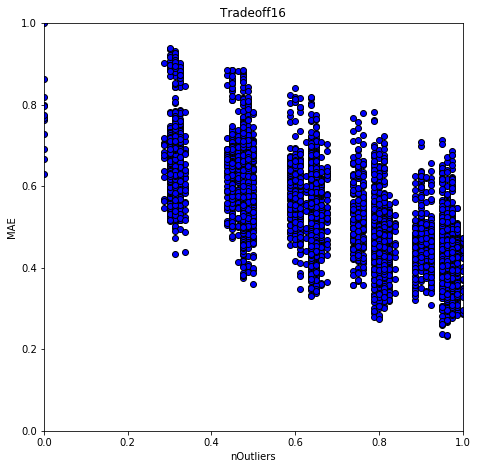

In [161]:
plt.figure(figsize=(7.5, 7.5))
plt.scatter(nOutliers16mod, MAE16mod, c='b', edgecolors= "black")
plt.title("Tradeoff16")
plt.xlabel("nOutliers")
plt.ylabel("MAE")
plt.xlim(xmin=0)
plt.xlim(xmax=1)
plt.ylim(ymin=0)
plt.ylim(ymax=1)
plt.show()

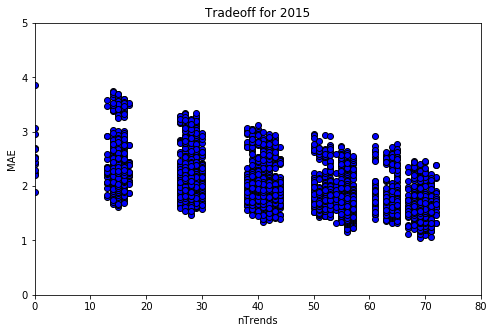

In [187]:
plt.figure(figsize=(8,5))
plt.scatter(nOutliers15, MAE15, c='b', edgecolors= "black")
plt.title("Tradeoff for 2015")
plt.xlabel("nTrends")
plt.ylabel("MAE")
plt.xlim(xmin=0)
plt.xlim(xmax=80)
plt.ylim(ymin=0)
plt.ylim(ymax=5)
plt.savefig("tradeoff2015.eps")

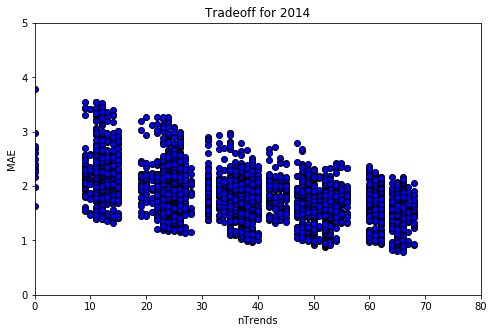

In [188]:
plt.figure(figsize=(8,5))
plt.scatter(nOutliers14, MAE14, c='b', edgecolors= "black")
plt.title("Tradeoff for 2014")
plt.xlabel("nTrends")
plt.ylabel("MAE")
plt.xlim(xmin=0)
plt.xlim(xmax=80)
plt.ylim(ymin=0)
plt.ylim(ymax=5)
plt.savefig("tradeoff2014.eps")

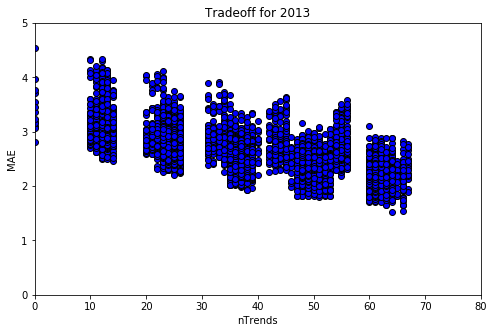

In [190]:
plt.figure(figsize=(8,5))
plt.scatter(nOutliers13, MAE13, c='b', edgecolors= "black")
plt.title("Tradeoff for 2013")
plt.xlabel("nTrends")
plt.ylabel("MAE")
plt.xlim(xmin=0)
plt.xlim(xmax=80)
plt.ylim(ymin=0)
plt.ylim(ymax=5)
plt.savefig("tradeoff2013.eps")
#plt.show()

In [306]:
a16 = listSummaryDF[0].iloc[7][5]
a15 = listSummaryDF[2].iloc[6][25]
a14 = listSummaryDF[4].iloc[7][7]
summary16m = New16[:]
summary15m = New15[:]
summary14m = New14[:]
anomaly16 = pd.DataFrame()
anomaly15 = pd.DataFrame()
anomaly14 = pd.DataFrame()
for item in a16:
    summary16m = summary16m.drop([item])    
    anomaly16 = anomaly16.append(New16.iloc[item])
for item in a15:
    summary15m = summary15m.drop([item]) 
    anomaly15 = anomaly15.append(New15.iloc[item])
for item in a14:
    summary14m = summary14m.drop([item])
    anomaly14 = anomaly14.append(New14.iloc[item])
all16m = pd.merge(summary16m, outputDF16, on=['antibiotic', 'bacteria'])
all15m = pd.merge(summary16m, outputDF15, on=['antibiotic', 'bacteria'])
all14m = pd.merge(summary16m, outputDF14, on=['antibiotic', 'bacteria'])

In [307]:
original16 = outputDF16.pmYd
original15 = outputDF15.pmYd
original14 = outputDF14.pmYd
subtracted16 = all16m.pmYd
subtracted15 = all15m.pmYd
subtracted14 = all14m.pmYd
print(len(original16))
print(len(subtracted16))
print(len(a16))
print(len(original15))
print(len(subtracted15))
print(len(a15))
print(len(original14))
print(len(subtracted14))
print(len(a14))

283
232
42
279
232
42
273
229
72


In [308]:
print(stats.ttest_ind(original14, subtracted14))
print(stats.ttest_ind(original15, subtracted15))
print(stats.ttest_ind(original16, subtracted16))

Ttest_indResult(statistic=4.253836935026347, pvalue=2.5090354524218578e-05)
Ttest_indResult(statistic=3.7359663892338695, pvalue=0.00020815285947869112)
Ttest_indResult(statistic=2.2792844047478598, pvalue=0.023060037525930957)


In [ ]:
anomaly16=anomaly16.set_index(np.arange(0,anomaly16.shape[0]))
anomaly15=anomaly15.set_index(np.arange(0,anomaly15.shape[0]))
anomaly14=anomaly14.set_index(np.arange(0,anomaly14.shape[0]))
summary16m=summary16m.set_index(np.arange(0,summary16m.shape[0]))
summary15m=summary15m.set_index(np.arange(0,summary15m.shape[0]))
summary14m=summary14m.set_index(np.arange(0,summary14m.shape[0]))

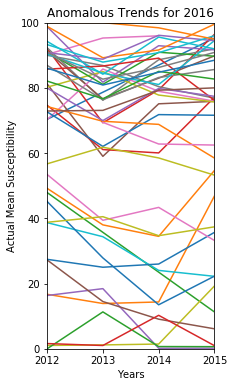

In [321]:
plt.close()
plt.figure(figsize=(3, 6))
for row in range(0, anomaly16.shape[0]):
    plt.plot(anomaly16.years[row], anomaly16.susc[row])
plt.title("Anomalous Trends for 2016")
plt.xlabel("Years")
plt.ylabel("Actual Mean Susceptibility")
plt.ylim(ymax=100)
plt.ylim(ymin=0)
plt.xlim(xmin = 2012)
plt.xlim(xmax = 2015)
plt.savefig("outliers2016.eps")
#plt.show()

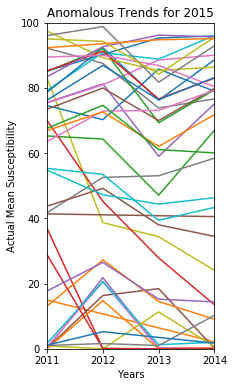

In [323]:
plt.close()
plt.figure(figsize=(3, 6))
for row in range(0, anomaly15.shape[0]):
    plt.plot(anomaly15.years[row], anomaly15.susc[row])
plt.title("Anomalous Trends for 2015")
plt.xlabel("Years")
plt.ylabel("Actual Mean Susceptibility")
plt.ylim(ymax=100)
plt.ylim(ymin=0)
plt.xlim(xmin = 2011)
plt.xlim(xmax = 2014)
plt.savefig("outliers2015.eps")
#plt.show()

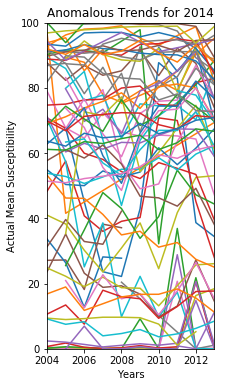

In [324]:
plt.close()
plt.figure(figsize=(3, 6))
for row in range(0, anomaly14.shape[0]):
    plt.plot(anomaly14.years[row], anomaly14.susc[row])
plt.title("Anomalous Trends for 2014")
plt.xlabel("Years")
plt.ylabel("Actual Mean Susceptibility")
plt.ylim(ymax=100)
plt.ylim(ymin=0)
plt.xlim(xmin = 2004)
plt.xlim(xmax = 2013)
plt.savefig("outliers2014.eps")
plt.show()

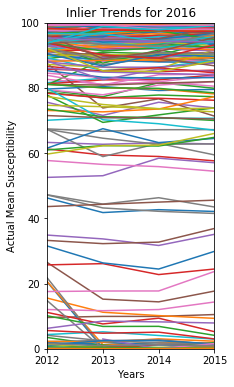

In [327]:
plt.close()
plt.figure(figsize=(3, 6))
for row in range(0, summary16m.shape[0]):
    plt.plot(summary16m.years[row], summary16m.susc[row])
plt.title("Inlier Trends for 2016")
plt.xlabel("Years")
plt.ylabel("Actual Mean Susceptibility")
plt.ylim(ymax=100)
plt.ylim(ymin=0)
plt.xlim(xmin = 2012)
plt.xlim(xmax = 2015)
plt.savefig("inliers2016.eps")
#plt.show()

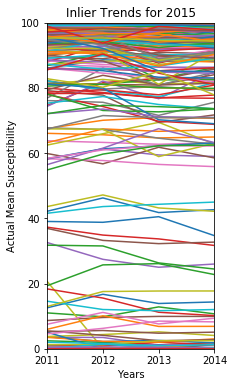

In [329]:
plt.close()
plt.figure(figsize=(3, 6))
for row in range(0, summary15m.shape[0]):
    plt.plot(summary15m.years[row], summary15m.susc[row])
plt.title("Inlier Trends for 2015")
plt.xlabel("Years")
plt.ylabel("Actual Mean Susceptibility")
plt.ylim(ymax=100)
plt.ylim(ymin=0)
plt.xlim(xmin = 2011)
plt.xlim(xmax = 2014)
plt.savefig("inliers2015.eps")

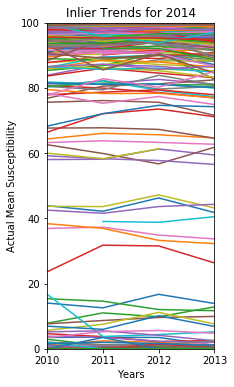

In [330]:
plt.close()
plt.figure(figsize=(3, 6))
for row in range(0, summary14m.shape[0]):
    plt.plot(summary14m.years[row], summary14m.susc[row])
plt.title("Inlier Trends for 2014")
plt.xlabel("Years")
plt.ylabel("Actual Mean Susceptibility")
plt.ylim(ymax=100)
plt.ylim(ymin=0)
plt.xlim(xmin = 2010)
plt.xlim(xmax = 2013)
plt.savefig("inliers2014.eps")

In [345]:
ab16 = set(anomaly16.antibiotic + " - " + anomaly16.bacteria)
ab15 = set(anomaly15.antibiotic + " - " + anomaly15.bacteria)
ab14 = set(anomaly14.antibiotic + " - " + anomaly14.bacteria)
ab14.intersection(ab16.intersection(ab15))

{'AMIKACIN - Acinetobacter baumannii',
 'AMPICILLIN+SULBACTAM - Acinetobacter baumannii',
 'CEFEPIME - Acinetobacter baumannii',
 'CEFOTETAN - Enterobacter aerogenes',
 'CEFOTETAN - Enterobacter cloacae',
 'CEFOTETAN - Serratia marcescens',
 'CEFTAZIDIME - Acinetobacter baumannii',
 'CEFTRIAXONE - Pseudomonas aeruginosa',
 'CEFUROXIME - Pseudomonas aeruginosa',
 'CEPHALOTHIN - E. coli',
 'IMIPENEM - Acinetobacter baumannii',
 'LEVOFLOXACIN - Acinetobacter baumannii',
 'MOXIFLOXACIN - E. coli',
 'MOXIFLOXACIN - Enterobacter cloacae',
 'NITROFURANTOIN - Pseudomonas aeruginosa',
 'PIPERACILLIN+TAZOBACTAM - Acinetobacter baumannii',
 'TETRACYCLINE - Acinetobacter baumannii',
 'TETRACYCLINE - Stenotrophomonas maltophilia',
 'TICARCILLIN+CLAVULANATE - Acinetobacter baumannii',
 'TICARCILLIN+CLAVULANATE - Klebsiella pneumoniae',
 'TICARCILLIN+CLAVULANATE - Stenotrophomonas maltophilia',
 'TIGECYCLINE - Acinetobacter baumannii'}